# Credit Card Transactions Fraud Detection (Classification)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Data Science Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Preprocessing Data

In [2]:
# Read Data
credit_train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
credit_train.drop(credit_train.columns[0], axis=1, inplace=True)
credit_train.drop_duplicates(inplace=True)

credit_test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
credit_test.drop(credit_test.columns[0], axis=1, inplace=True)
credit_test.drop_duplicates(inplace=True)

credit_train.shape, credit_test.shape

((1296675, 22), (555719, 22))

In [3]:
credit_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
credit_train.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


This dataset has 9 numerical features

In [5]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
# Checking Data for find missing value
credit_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
credit_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
credit_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [9]:
# credit_train['age'] = dt.date.today().year - pd.to_datetime(credit_train['dob']).dt.year
# credit_train['year'] = pd.to_datetime(credit_train['trans_date_trans_time']).dt.year
# credit_train['month'] = pd.to_datetime(credit_train['trans_date_trans_time']).dt.month
# credit_train['day'] = pd.to_datetime(credit_train['trans_date_trans_time']).dt.day
# credit_train['hour'] = pd.to_datetime(credit_train['trans_date_trans_time']).dt.hour

# credit_test['age'] = dt.date.today().year - pd.to_datetime(credit_test['dob']).dt.year
# credit_test['year'] = pd.to_datetime(credit_test['trans_date_trans_time']).dt.year
# credit_test['month'] = pd.to_datetime(credit_test['trans_date_trans_time']).dt.month
# credit_test['day'] = pd.to_datetime(credit_test['trans_date_trans_time']).dt.day
# credit_test['hour'] = pd.to_datetime(credit_test['trans_date_trans_time']).dt.hour

In [10]:
gender = {'F': 0, 'M': 1}
credit_train['gender'] = credit_train["gender"].map(gender)
credit_test['gender'] = credit_test["gender"].map(gender)

In [11]:
credit_train.drop(['cc_num', 'first', 'last', 'trans_num', 'dob', 'trans_date_trans_time'], axis=1, inplace=True)
credit_test.drop(['cc_num', 'first', 'last', 'trans_num', 'dob', 'trans_date_trans_time'], axis=1, inplace=True)

In [12]:
credit_train.nunique()

merchant          693
category           14
amt             52928
gender              2
street            983
city              894
state              51
zip               970
lat               968
long              969
city_pop          879
job               494
unix_time     1274823
merch_lat     1247805
merch_long    1275745
is_fraud            2
dtype: int64

In [13]:
from category_encoders.count import CountEncoder
merchant_enc = CountEncoder()
category_enc = CountEncoder()
city_enc = CountEncoder()
street_enc = CountEncoder()
state_enc = CountEncoder()
job_enc = CountEncoder()
ccnum_enc = CountEncoder()

credit_train['merchant'] = merchant_enc.fit_transform(credit_train['merchant'], credit_train['is_fraud'])
credit_train['category'] = category_enc.fit_transform(credit_train['category'], credit_train['is_fraud'])
credit_train['street'] = street_enc.fit_transform(credit_train['street'], credit_train['is_fraud'])
credit_train['city'] = city_enc.fit_transform(credit_train['city'], credit_train['is_fraud'])
credit_train['state'] = state_enc.fit_transform(credit_train['state'], credit_train['is_fraud'])
credit_train['job'] = job_enc.fit_transform(credit_train['job'], credit_train['is_fraud'])

credit_test['merchant'] = merchant_enc.transform(credit_test['merchant'])
credit_test['category'] = category_enc.transform(credit_test['category'])
credit_test['street'] = street_enc.transform(credit_test['street'])
credit_test['city'] = city_enc.transform(credit_test['city'])
credit_test['state'] = state_enc.transform(credit_test['state'])
credit_test['job'] = job_enc.transform(credit_test['job'])

In [14]:
credit_train

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,1267,63287,4.97,0,2028,2028,30266,28654,36.0788,-81.1781,3495,3545,1325376018,36.011293,-82.048315,0
1,2503,123638,107.23,0,3030,3545,18924,99160,48.8878,-118.2105,149,5099,1325376044,49.159047,-118.186462,0
2,1895,94014,220.11,1,503,503,5545,83252,42.1808,-112.2620,4154,511,1325376051,43.150704,-112.154481,0
3,2613,131659,45.00,1,493,493,11754,59632,46.2306,-112.1138,1939,2530,1325376076,47.034331,-112.561071,0
4,1592,79655,41.96,1,2017,2017,29250,24433,38.4207,-79.4629,99,2017,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1907,94014,15.56,1,1513,1513,10699,84735,37.7175,-112.4777,258,5620,1371816728,36.841266,-111.690765,0
1296671,1751,91461,51.70,1,531,531,26193,21790,39.2667,-77.5101,100,531,1371816739,38.906881,-78.246528,0
1296672,1853,91461,105.93,1,2070,2070,16407,88325,32.9396,-105.8189,899,8684,1371816752,33.619513,-105.130529,0
1296673,1910,91461,74.90,1,2024,2024,12324,57756,43.3526,-102.5411,1126,2024,1371816816,42.788940,-103.241160,0


In [15]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  int64  
 1   category    1296675 non-null  int64  
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  int64  
 4   street      1296675 non-null  int64  
 5   city        1296675 non-null  int64  
 6   state       1296675 non-null  int64  
 7   zip         1296675 non-null  int64  
 8   lat         1296675 non-null  float64
 9   long        1296675 non-null  float64
 10  city_pop    1296675 non-null  int64  
 11  job         1296675 non-null  int64  
 12  unix_time   1296675 non-null  int64  
 13  merch_lat   1296675 non-null  float64
 14  merch_long  1296675 non-null  float64
 15  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 158.3 MB


In [16]:
corr_mat = credit_train.corr()
corr_mat

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
merchant,1.000000,0.883707,0.011319,-0.004984,-0.020298,-0.015851,-0.002092,0.000371,0.006068,-0.002272,-0.012410,-0.003613,0.000269,0.006023,-0.002250,0.007968
category,0.883707,1.000000,0.010972,-0.005625,-0.022846,-0.018546,-0.002835,0.001021,0.007034,-0.003076,-0.014917,-0.003891,-0.000048,0.007024,-0.003089,0.005784
amt,0.011319,0.010972,1.000000,0.001034,-0.010450,-0.008505,0.006272,0.001843,-0.001926,-0.000187,0.005818,-0.006049,-0.000293,-0.001873,-0.000151,0.219404
gender,-0.004984,-0.005625,0.001034,1.000000,-0.215766,-0.140828,-0.029052,-0.065951,0.042935,0.050404,-0.028649,-0.096290,-0.000960,0.042645,0.050350,0.007642
street,-0.020298,-0.022846,-0.010450,-0.215766,1.000000,0.726698,0.001601,0.030810,-0.022515,-0.014670,0.022536,0.359880,0.000276,-0.022303,-0.014685,-0.054882
city,-0.015851,-0.018546,-0.008505,-0.140828,0.726698,1.000000,0.036934,0.060794,-0.081793,-0.031758,0.273448,0.272248,-0.001206,-0.081119,-0.031775,-0.038308
state,-0.002092,-0.002835,0.006272,-0.029052,0.001601,0.036934,1.000000,-0.088236,-0.199875,0.159166,0.168790,0.016491,0.000244,-0.198572,0.159076,-0.000353
zip,0.000371,0.001021,0.001843,-0.065951,0.030810,0.060794,-0.088236,1.000000,-0.114290,-0.909732,0.078467,-0.019066,0.000670,-0.113561,-0.908924,-0.002162
lat,0.006068,0.007034,-0.001926,0.042935,-0.022515,-0.081793,-0.199875,-0.114290,1.000000,-0.015533,-0.155730,-0.067575,0.000632,0.993592,-0.015509,0.001894
long,-0.002272,-0.003076,-0.000187,0.050404,-0.014670,-0.031758,0.159166,-0.909732,-0.015533,1.000000,-0.052715,0.026913,-0.000642,-0.015452,0.999120,0.001721


<Axes: >

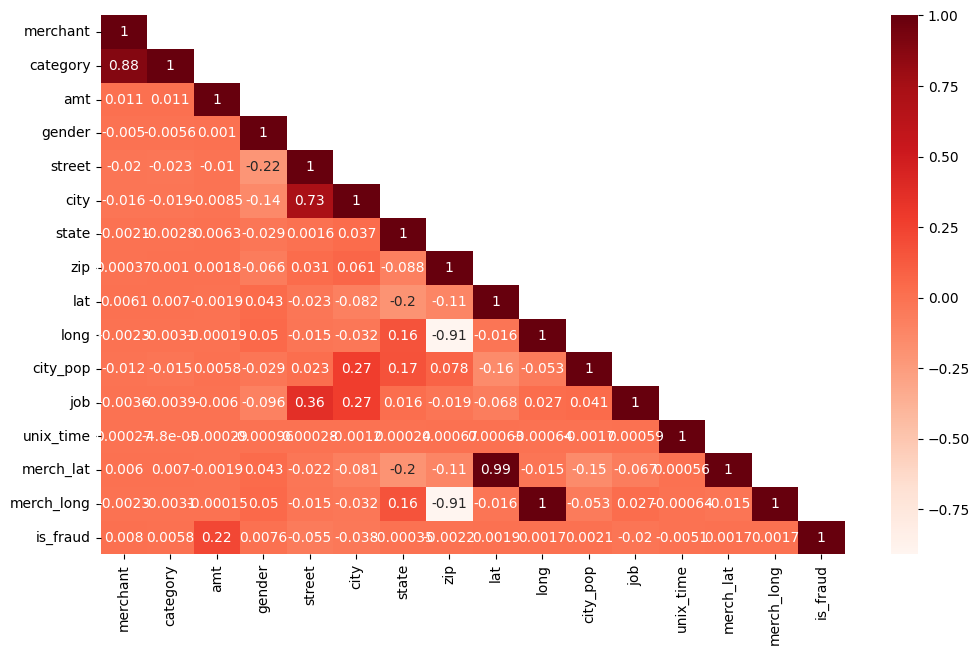

In [17]:
plt.figure(figsize=(12, 7))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

In [18]:
credit_train.drop(['long', 'lat', 'unix_time'], axis=1, inplace=True)
credit_test.drop(['long', 'lat', 'unix_time'], axis=1, inplace=True)

In [19]:
x_train = credit_train.drop(columns='is_fraud')
y_train = credit_train['is_fraud']

x_test = credit_test.drop(columns='is_fraud')
y_test = credit_test['is_fraud']

In [20]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1296675, 12) (555719, 12) (1296675,) (555719,)


In [21]:
y_train.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [22]:
y_test.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

#### Functions for Analysis a Model

In [23]:
model_name_test, accuracy_test, recall_test, precision_test, f1_test, roc_auc_test = [], [], [], [], [], []

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model_with_test(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]

    model_name_test.append(modelname)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    roc_auc_test.append(roc_auc_score(y_test, y_score))

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_score))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_test, y_score), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Test')
    plt.legend()
    plt.show()
    print(classification_report(y_test, y_pred))

In [25]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model_with_test_svm(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)

    model_name_test.append(modelname)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    roc_auc_test.append(roc_auc_score(y_test, y_pred))

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_test, y_pred), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Test')
    plt.legend()
    plt.show()
    print(classification_report(y_test, y_pred))

In [26]:
model_name_train, accuracy_train, recall_train, precision_train, f1_train, roc_auc_train = [], [], [], [], [], []

In [27]:
def analysis_model_with_train(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)
    y_score = model.predict_proba(x_train)[:,1]
    
    model_name_train.append(modelname)
    accuracy_train.append(accuracy_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_score))

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_score))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_train, y_score)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_train, y_score), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Train')
    plt.legend()
    plt.show()
    print(classification_report(y_train, y_pred))

In [28]:
def analysis_model_with_train_svm(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)

    model_name_train.append(modelname)
    accuracy_train.append(accuracy_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_pred))

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_pred))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_train, y_pred)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_train, y_pred), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Train')
    plt.legend()
    plt.show()
    print(classification_report(y_train, y_pred))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_decision_regions

### Training Model with Combine UnderSampling and OverSampling

In [30]:
sampler = Pipeline([('over', SMOTE(sampling_strategy={1:150000}, random_state=42)), ('under', RandomUnderSampler(random_state=42))])
x_sample, y_sample = sampler.fit_resample(x_train, y_train)
print(x_sample.shape, y_sample.shape)

(300000, 12) (300000,)


In [31]:
y_sample.value_counts()

is_fraud
0    150000
1    150000
Name: count, dtype: int64

In [32]:
y_test.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

#### Logistic Regression

In [33]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [34]:
logistic_model.fit(x_sample, y_sample)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.8591566666666667
F1 Score: 0.8484528946131968
Recall Score: 0.7885266666666667
Precision Score: 0.9182367965468787
ROC AUC: 0.9099244988888888


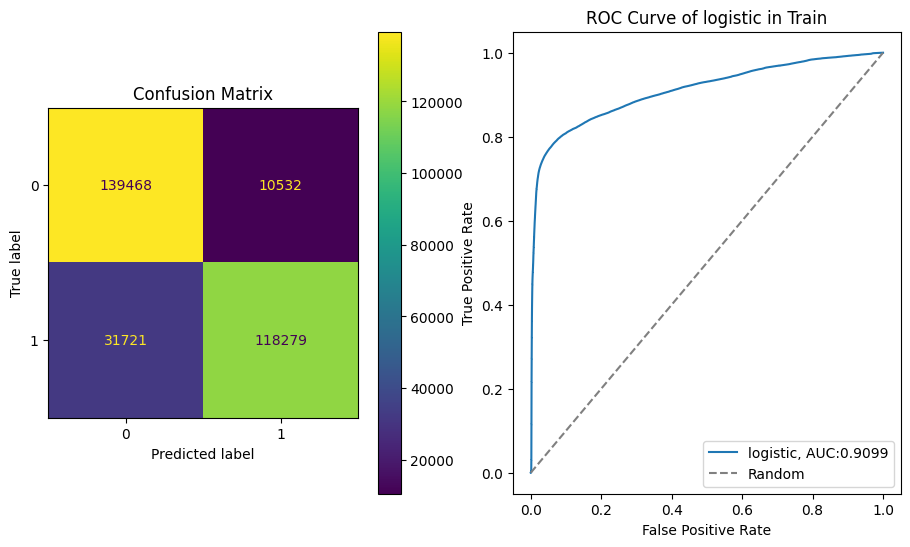

              precision    recall  f1-score   support

           0       0.81      0.93      0.87    150000
           1       0.92      0.79      0.85    150000

    accuracy                           0.86    300000
   macro avg       0.87      0.86      0.86    300000
weighted avg       0.87      0.86      0.86    300000



In [35]:
analysis_model_with_train('logistic', logistic_model, x_sample, y_sample)

Accuracy Score: 0.9281885269353756
F1 Score: 0.07427683314389108
Recall Score: 0.7463869463869464
Precision Score: 0.03908309735377405
ROC AUC: 0.8763939819148338


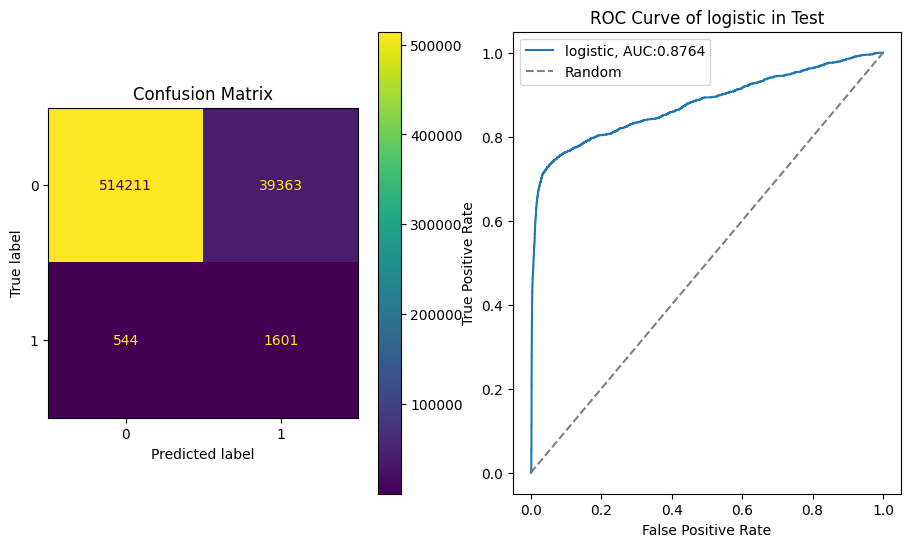

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.04      0.75      0.07      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       1.00      0.93      0.96    555719



In [36]:
analysis_model_with_test('logistic', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [37]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [38]:
linearSVC_model.fit(x_sample, y_sample)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.85345
F1 Score: 0.8398739824813796
Recall Score: 0.7686666666666667
Precision Score: 0.925621161642516
ROC AUC: 0.8534500000000002


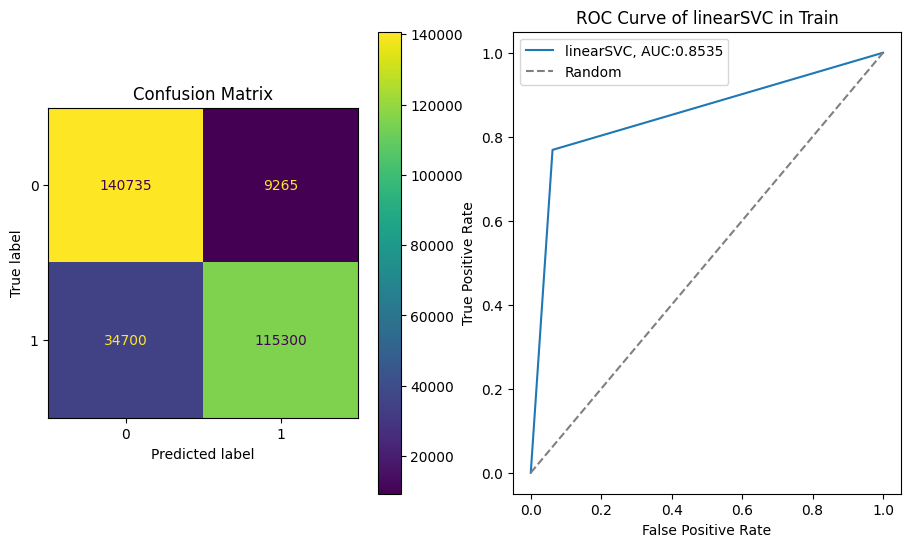

              precision    recall  f1-score   support

           0       0.80      0.94      0.86    150000
           1       0.93      0.77      0.84    150000

    accuracy                           0.85    300000
   macro avg       0.86      0.85      0.85    300000
weighted avg       0.86      0.85      0.85    300000



In [39]:
analysis_model_with_train_svm('linearSVC', linearSVC_model, x_sample, y_sample)

Accuracy Score: 0.9365812577939571
F1 Score: 0.08142414053744104
Recall Score: 0.7282051282051282
Precision Score: 0.04312296394456408
ROC AUC: 0.832796903070796


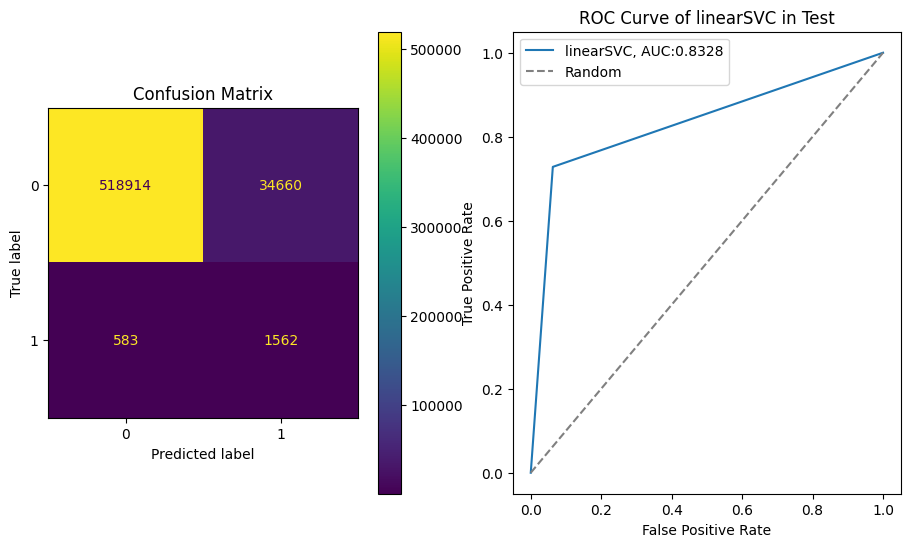

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.04      0.73      0.08      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.83      0.52    555719
weighted avg       1.00      0.94      0.96    555719



In [40]:
analysis_model_with_test_svm('linearSVC', linearSVC_model, x_test, y_test)

#### Decision Tree

In [41]:
grid_parameters = {'max_depth': np.arange(2, 15)}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_parameters, cv=5, scoring='f1')

In [42]:
grid_search.fit(x_sample, y_sample)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='f1')

In [43]:
grid_search.best_params_

{'max_depth': 14}

Accuracy Score: 0.9821566666666667
F1 Score: 0.9822306464087848
Recall Score: 0.98632
Precision Score: 0.9781750623144616
ROC AUC: 0.9985431455111111


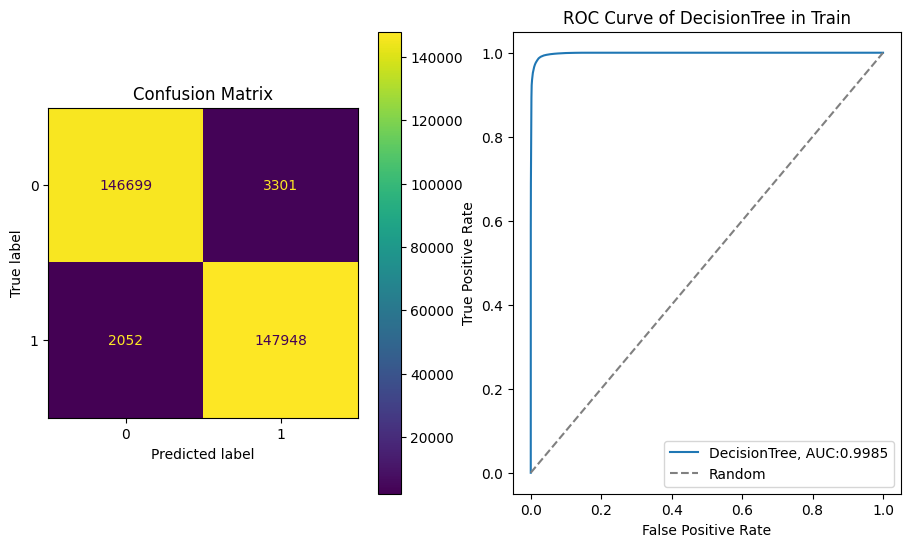

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    150000
           1       0.98      0.99      0.98    150000

    accuracy                           0.98    300000
   macro avg       0.98      0.98      0.98    300000
weighted avg       0.98      0.98      0.98    300000



In [44]:
analysis_model_with_train('DecisionTree', grid_search.best_estimator_, x_sample, y_sample)

Accuracy Score: 0.974019243538551
F1 Score: 0.20879000438404208
Recall Score: 0.8881118881118881
Precision Score: 0.11830093771346954
ROC AUC: 0.9632277811294528


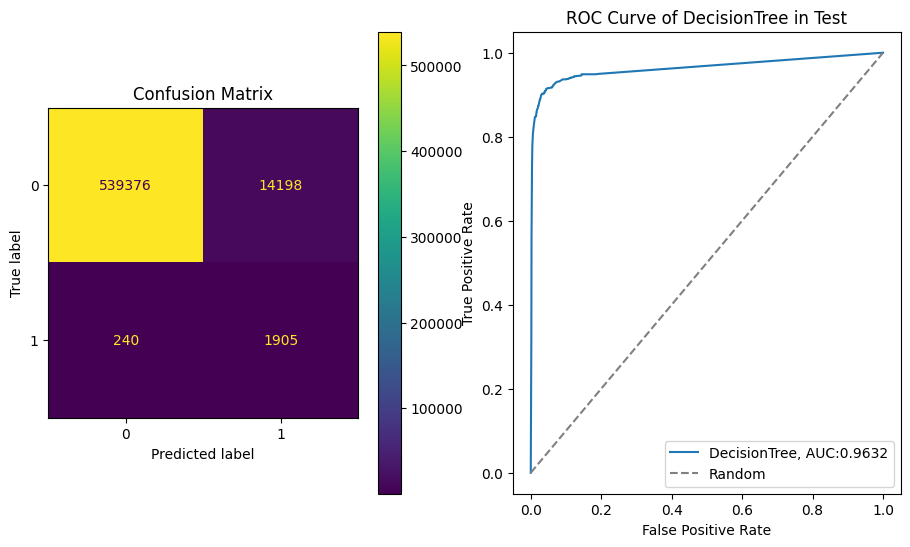

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.12      0.89      0.21      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.93      0.60    555719
weighted avg       1.00      0.97      0.98    555719



In [45]:
analysis_model_with_test('DecisionTree', grid_search.best_estimator_, x_test, y_test)

#### Random Forest

In [46]:
random_forest = RandomForestClassifier(n_estimators=120)

In [47]:
random_forest.fit(x_sample, y_sample)

RandomForestClassifier(n_estimators=120)

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


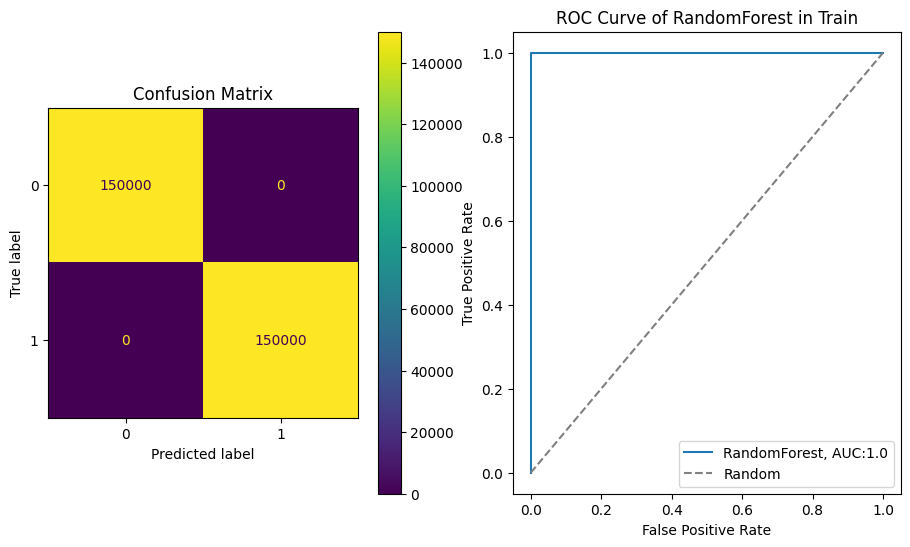

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    150000
           1       1.00      1.00      1.00    150000

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



In [48]:
analysis_model_with_train('RandomForest', random_forest, x_sample, y_sample)

Accuracy Score: 0.9923000653207826
F1 Score: 0.4440691178381188
Recall Score: 0.7967365967365967
Precision Score: 0.3078170028818444
ROC AUC: 0.9802406844312714


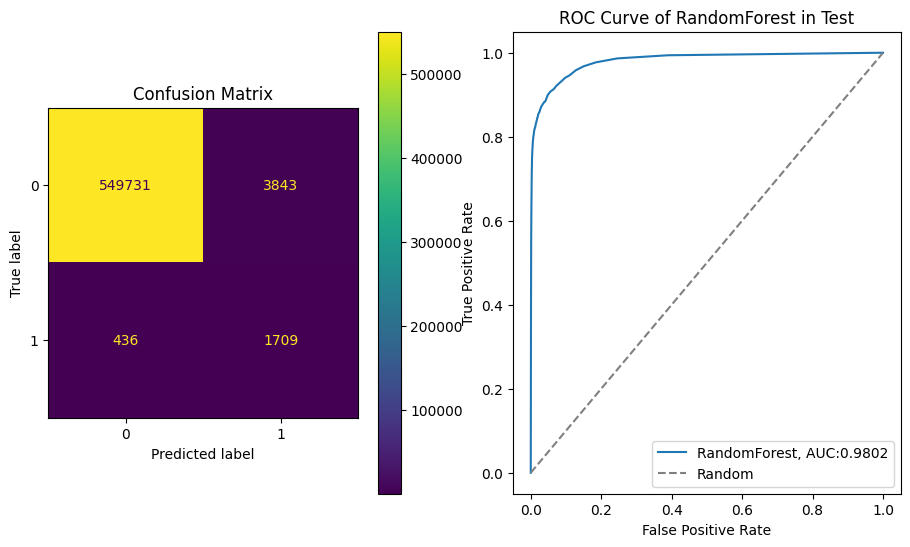

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.31      0.80      0.44      2145

    accuracy                           0.99    555719
   macro avg       0.65      0.89      0.72    555719
weighted avg       1.00      0.99      0.99    555719



In [49]:
analysis_model_with_test('RandomForest', random_forest, x_test, y_test)

#### KNN

In [50]:
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [51]:
knn_clf.fit(x_sample, y_sample)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.98363
F1 Score: 0.9837597595214238
Recall Score: 0.99162
Precision Score: 0.9760231500620091
ROC AUC: 0.9993348853111111


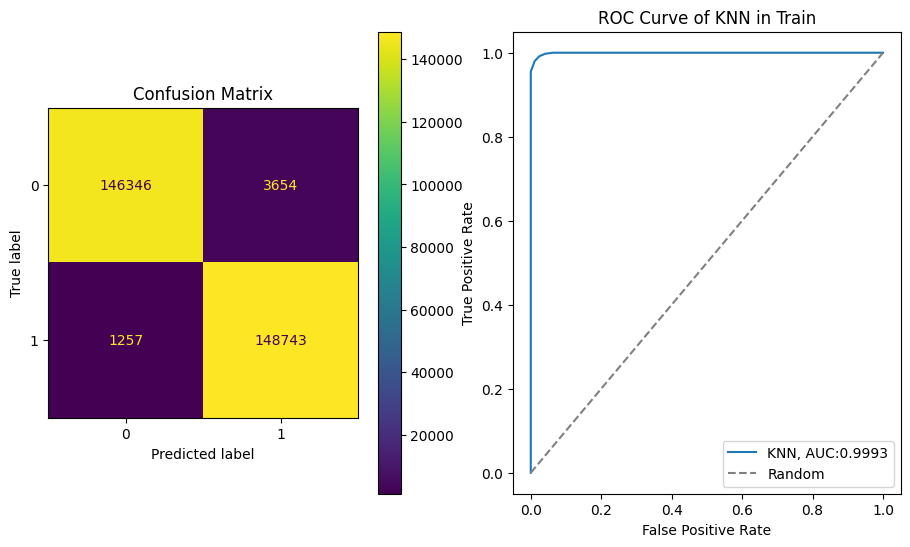

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    150000
           1       0.98      0.99      0.98    150000

    accuracy                           0.98    300000
   macro avg       0.98      0.98      0.98    300000
weighted avg       0.98      0.98      0.98    300000



In [52]:
analysis_model_with_train('KNN', knn_clf, x_sample, y_sample)

Accuracy Score: 0.964663795911243
F1 Score: 0.10915029714648643
Recall Score: 0.5608391608391609
Precision Score: 0.06045833752135893
ROC AUC: 0.7892093722687283


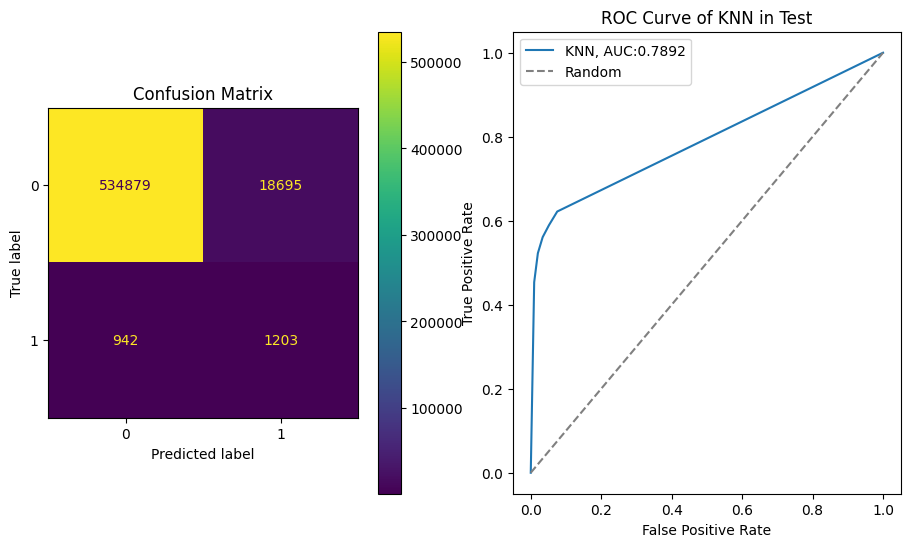

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.06      0.56      0.11      2145

    accuracy                           0.96    555719
   macro avg       0.53      0.76      0.55    555719
weighted avg       0.99      0.96      0.98    555719



In [53]:
analysis_model_with_test('KNN', knn_clf, x_test, y_test)

### Naive Bayes

In [54]:
# Gaussian NB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [55]:
gaussian_nb_clf.fit(x_sample, y_sample)   

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.83963
F1 Score: 0.8224391504124301
Recall Score: 0.7428133333333333
Precision Score: 0.9211855648795007
ROC AUC: 0.8981034624222222


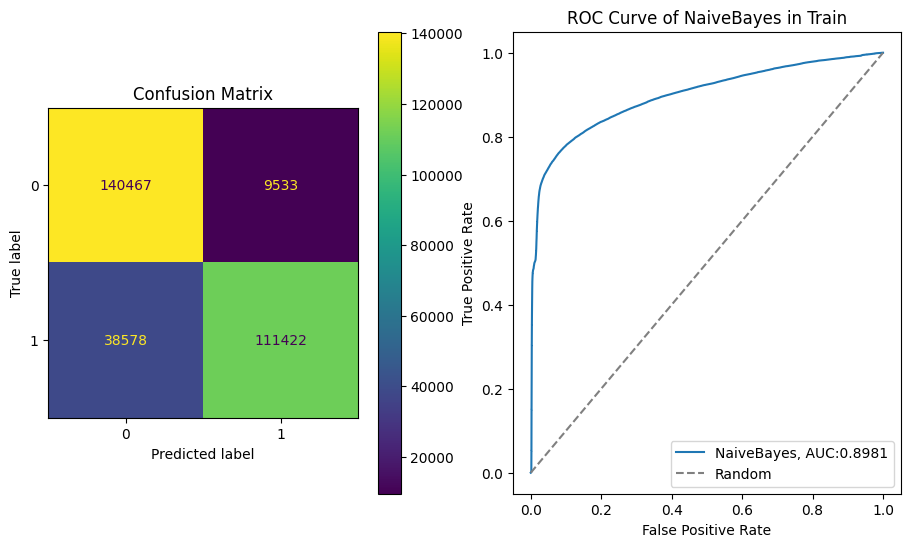

              precision    recall  f1-score   support

           0       0.78      0.94      0.85    150000
           1       0.92      0.74      0.82    150000

    accuracy                           0.84    300000
   macro avg       0.85      0.84      0.84    300000
weighted avg       0.85      0.84      0.84    300000



In [56]:
analysis_model_with_train('NaiveBayes', gaussian_nb_clf, x_sample, y_sample)

Accuracy Score: 0.9356635277901242
F1 Score: 0.07812701441353169
Recall Score: 0.7062937062937062
Precision Score: 0.041350510399039246
ROC AUC: 0.8699369630479111


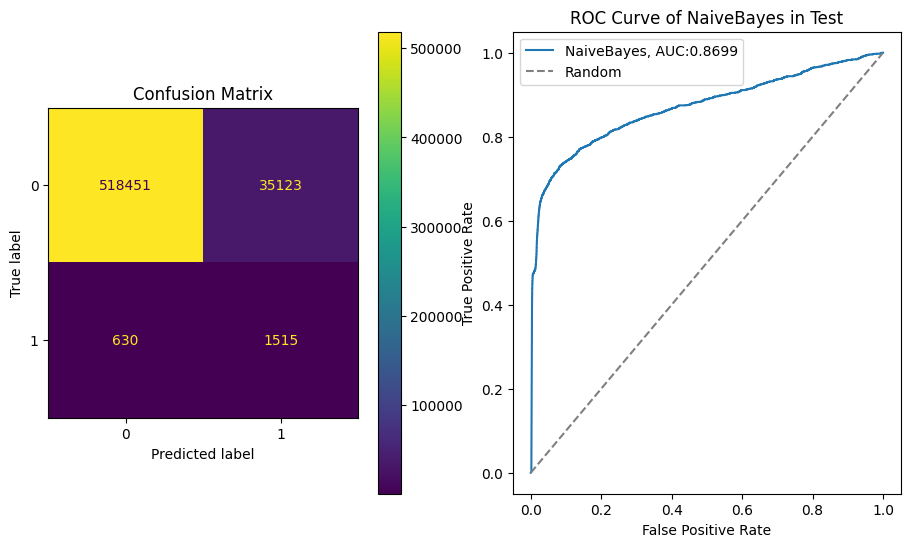

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.04      0.71      0.08      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.82      0.52    555719
weighted avg       1.00      0.94      0.96    555719



In [57]:
analysis_model_with_test('NaiveBayes', gaussian_nb_clf, x_test, y_test)

#### XG Boost

In [58]:
xgb = XGBClassifier(n_estimators=120) 

In [59]:
xgb.fit(x_sample, y_sample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score: 0.9944266666666667
F1 Score: 0.9944269638952591
Recall Score: 0.99448
Precision Score: 0.994373933447099
ROC AUC: 0.9997957971777778


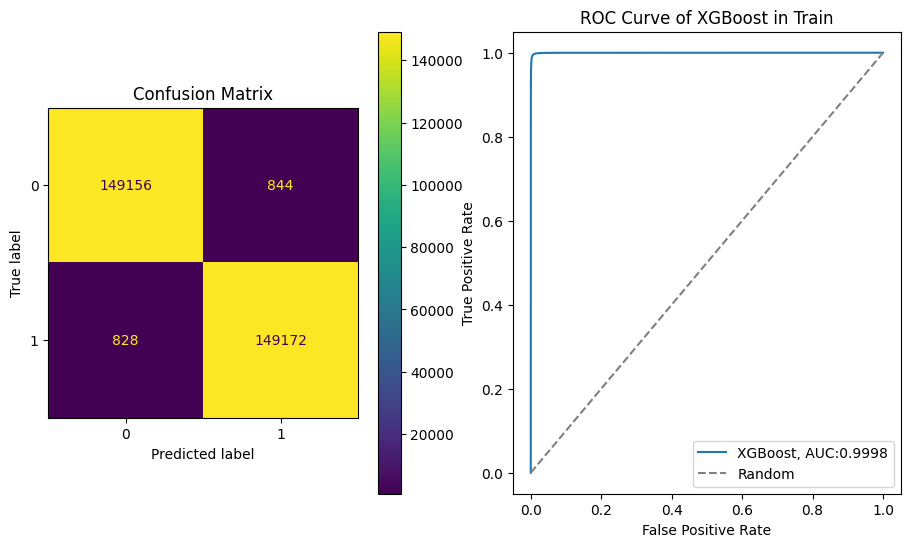

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    150000
           1       0.99      0.99      0.99    150000

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000



In [60]:
analysis_model_with_train('XGBoost', xgb, x_sample, y_sample)

Accuracy Score: 0.9912347787280982
F1 Score: 0.4167165608909113
Recall Score: 0.8111888111888111
Precision Score: 0.2803738317757009
ROC AUC: 0.9894224656167955


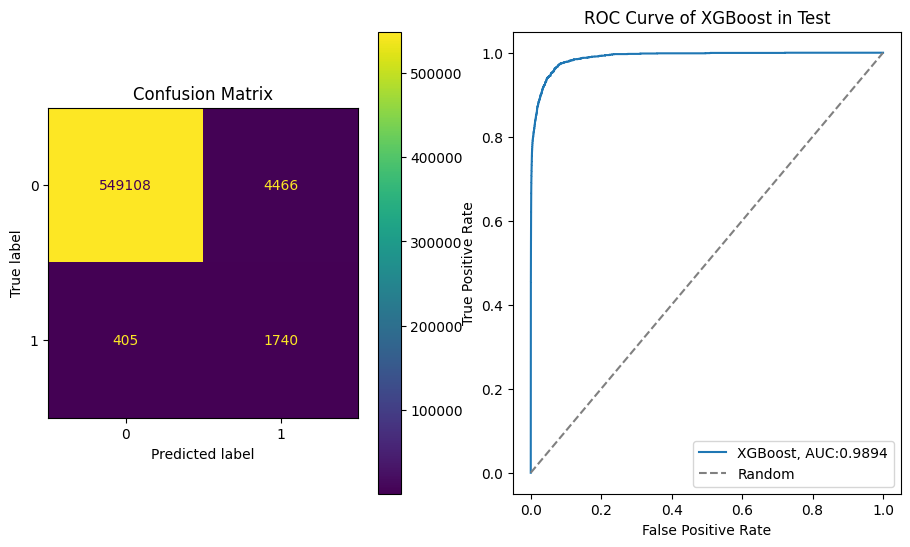

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.28      0.81      0.42      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.90      0.71    555719
weighted avg       1.00      0.99      0.99    555719



In [61]:
analysis_model_with_test('XGBoost', xgb, x_test, y_test)

#### LGBM

In [62]:
from lightgbm import LGBMClassifier

In [63]:
lgbm = LGBMClassifier(n_estimators=120)

In [64]:
lgbm.fit(x_sample, y_sample)

LGBMClassifier(n_estimators=120)

Accuracy Score: 0.9881566666666667
F1 Score: 0.9881443763368025
Recall Score: 0.98712
Precision Score: 0.9891708809598567
ROC AUC: 0.9992474313777777


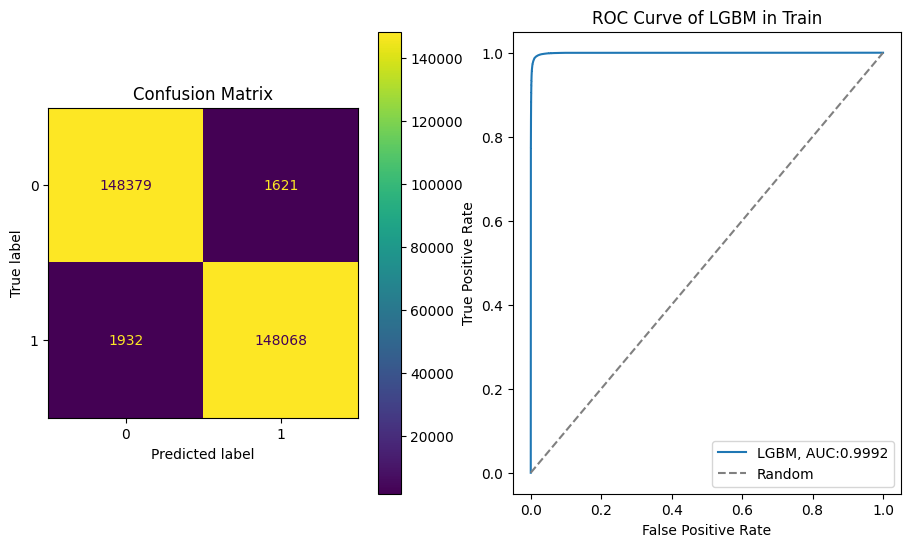

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    150000
           1       0.99      0.99      0.99    150000

    accuracy                           0.99    300000
   macro avg       0.99      0.99      0.99    300000
weighted avg       0.99      0.99      0.99    300000



In [65]:
analysis_model_with_train('LGBM', lgbm, x_sample, y_sample)

Accuracy Score: 0.9876574311837457
F1 Score: 0.35274134188921397
Recall Score: 0.8713286713286713
Precision Score: 0.22113109323237104
ROC AUC: 0.9927772294303238


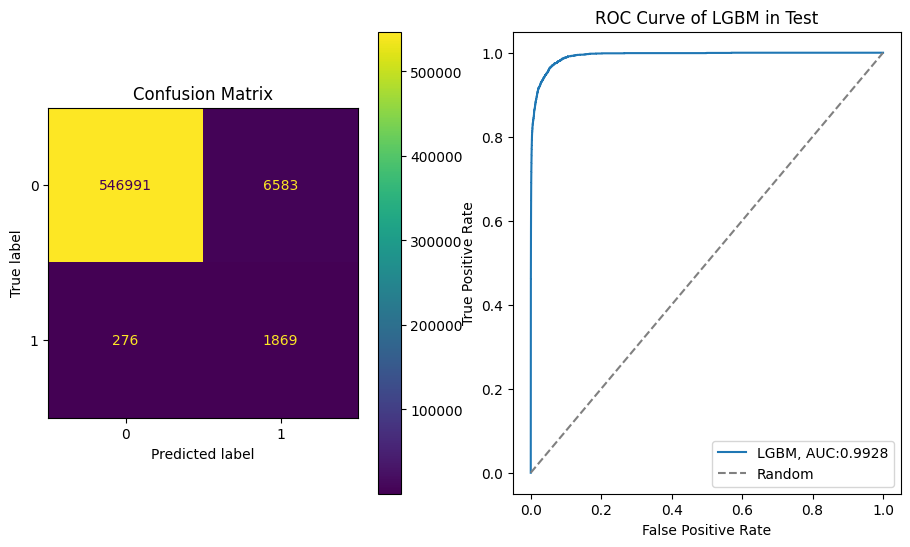

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.22      0.87      0.35      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.93      0.67    555719
weighted avg       1.00      0.99      0.99    555719



In [66]:
analysis_model_with_test('LGBM', lgbm, x_test, y_test)

#### Neural Network

In [67]:
mlp = MLPClassifier(max_iter=500)

In [68]:
mlp.fit(x_sample, y_sample)

MLPClassifier(max_iter=500)

Accuracy Score: 0.8579266666666666
F1 Score: 0.846286452059636
Recall Score: 0.7822
Precision Score: 0.9218114108829214
ROC AUC: 0.8940700771777776


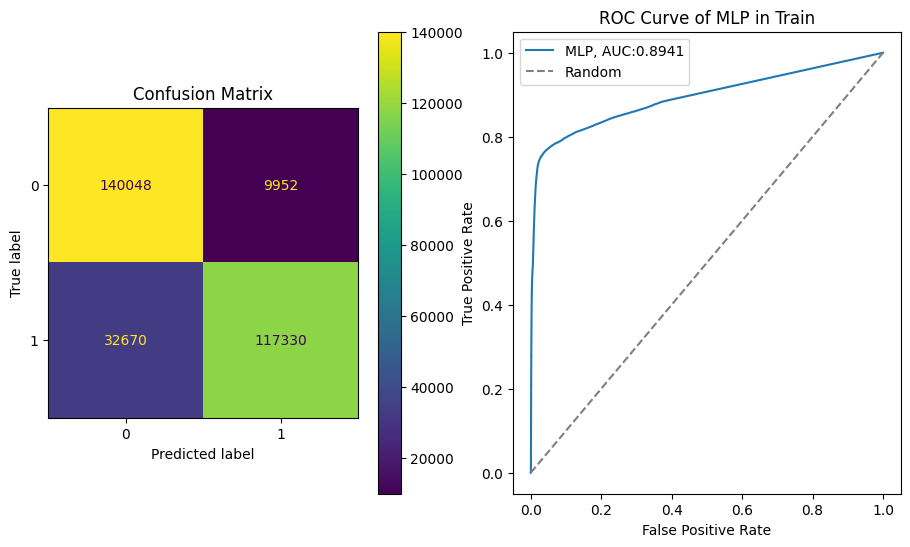

              precision    recall  f1-score   support

           0       0.81      0.93      0.87    150000
           1       0.92      0.78      0.85    150000

    accuracy                           0.86    300000
   macro avg       0.87      0.86      0.86    300000
weighted avg       0.87      0.86      0.86    300000



In [69]:
analysis_model_with_train('MLP', mlp, x_sample, y_sample)

Accuracy Score: 0.9325234516005391
F1 Score: 0.07849208689668731
Recall Score: 0.7445221445221445
Precision Score: 0.041429942667393055
ROC AUC: 0.8689059976887802


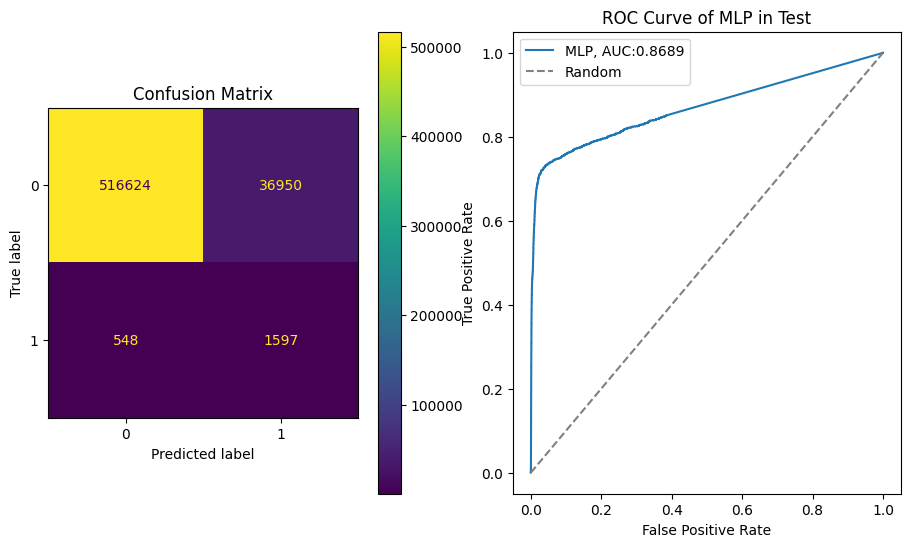

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.04      0.74      0.08      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       1.00      0.93      0.96    555719



In [70]:
analysis_model_with_test('MLP', mlp, x_test, y_test)